In [1]:
import pandas as pd
import os
import numpy as np

# data- preprocessing

In [2]:
# Define the directory containing your CSV files
# place the link to the text file here
# directory = '/Users/martinso/Desktop/LST/HS-KI/Year 2/research trend/text'
directory = r'C:\awilde\katja\Dokumente\Studium\Schweden\HealthInformatics_KarolinskaUni\Lectures\03_Semester\TrendsInHI\SU_project\text'

data = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Initialize a list to store each row's text as a list of words
        texts = []

        # Loop through each row in the DataFrame
        for index, row in df.iterrows():
            # Check for NaN and add text to the list after splitting into words
            if pd.notna(row['Text']):
                # Split the text into words and append the list of words
                texts.append(row['Text'].split())

        # Append the filename (without extension) and the list of texts to the data list
        data.append([os.path.splitext(filename)[0], texts])

# Create a DataFrame from the collected data
df_combined = pd.DataFrame(data, columns=['File Name', 'Text Data'])

# Define the path for the output Excel file
#output_file_path = os.path.join(directory, 'aggregated_texts_by-sentence.xlsx')

# Save the DataFrame to Excel
#df_combined.to_excel(output_file_path, index=False)


#print("All files have been processed and output to 'aggregated_texts.csv'.")

In [3]:
df_combined.head()

,File Name,Text Data
0,300_Transcript,"[[so, I'm, going, to], [interview, in, Spanish..."
1,301_Transcript,"[[yeah, there's, also, on, Craigslist, so, tha..."
2,302_Transcript,"[[just, move, around, a, little, bit], [when, ..."
3,303_Transcript,"[[wow, okay], [when, you're, finished, when, s..."
4,304_Transcript,"[[so, we'll, just, move, around, a, little, bi..."


In [4]:
df_combined.rename(columns={'File Name': 'Name'}, inplace=True)
df_combined['Name'] = df_combined['Name'].str.replace('_Transcript', '')
df_combined['Name']=df_combined['Name'].astype(int)

In [5]:
df_combined.head()

,Name,Text Data
0,300,"[[so, I'm, going, to], [interview, in, Spanish..."
1,301,"[[yeah, there's, also, on, Craigslist, so, tha..."
2,302,"[[just, move, around, a, little, bit], [when, ..."
3,303,"[[wow, okay], [when, you're, finished, when, s..."
4,304,"[[so, we'll, just, move, around, a, little, bi..."


In [6]:
df = pd.read_csv('label_daic_extend - label_daic_extend.csv')
df.head()
df_filtered = df[['Participant_ID','depression']]

In [7]:
depression_map = df_filtered.set_index('Participant_ID')['depression']

df_combined['depression'] = df_combined['Name'].map(depression_map)




In [8]:
df_combined

,Name,Text Data,depression
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0
2,302,"[[just, move, around, a, little, bit], [when, ...",0
3,303,"[[wow, okay], [when, you're, finished, when, s...",0
4,304,"[[so, we'll, just, move, around, a, little, bi...",0
...,...,...,...
214,698,"[[going, to, press, that, button, it, just, me...",1
215,702,"[[hi], [I'm, not, a, therapist], [are, you, ok...",0
216,703,"[[and, please], [are, you, okay, with, this, y...",0
217,707,"[[okay, but, but, okay, but, I, don't, stop, u...",0


Percentage of interviewee with depression

In [9]:
# Calculate value counts for depression labels
value_counts = df_combined['depression'].value_counts()

# Calculate percentage for each label
percentages = (value_counts / value_counts.sum()) * 100
print(f"Percentage of patients without depression: {percentages[0]:.2f}%")
print(f"Percentage of patients with depression: {percentages[1]:.2f}%")

Percentage of patients without depression: 70.32%
Percentage of patients with depression: 29.68%


It seem like there is a imbalanced class in the data, we should take account of that when we try to build up the ML model.

In [10]:
df_combined['lengths of speech'] = df_combined['Text Data'].apply(lambda x: [len(lst) for lst in x])
# Count the number of inner lists in each cell and create a new column
df_combined['frequency of speech'] = df_combined['Text Data'].apply(len)

In [11]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80


Here i try to calculate the frequency of interviewees speak in the interview and the length of their speech per times

In [12]:
def calculate_mean(lengths):
    if len(lengths) > 0:  # Check if the list is not empty to avoid division by zero
        return sum(lengths) / len(lengths)
    else:
        return None
    
df_combined['mean length of speech'] = df_combined['lengths of speech'].apply(calculate_mean)

In [13]:
mean_values = df_combined.groupby('depression')[['frequency of speech', 'mean length of speech']].mean()

print(mean_values)

            frequency of speech  mean length of speech
depression                                            
0                     88.642857              15.954897
1                    105.553846              14.008058


There is a significant difference in frequency of speech

In [14]:
def flatten_text(row):
    # This will flatten the list of lists found in 'Text Data' for a row
    flattened = [item for sublist in row['Text Data'] for item in sublist]
    return flattened  # Returning the flattened list directly

# Apply this function and create a new column
df_combined['flattened text'] = df_combined.apply(flatten_text, axis=1)


In [15]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o..."
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that..."
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you..."
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'..."
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit..."


In [16]:
def mean_word_length(words):
    if not words:  # Check if the list is empty
        return 0
    return sum(len(word) for word in words) / len(words)

# Apply the function to calculate the mean word length for each row
df_combined['mean_word_length'] = df_combined['flattened text'].apply(mean_word_length)

In [17]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_combined is already defined and includes the necessary columns
# Convert 'depression' to a categorical type if it's not already
df_combined['depression'] = df_combined['depression'].astype('category')

def visualize(col):
    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # figsize can be adjusted based on your display preferences

    # First plot: Boxplot
    sns.boxplot(ax=axes[0], y=df_combined[col], x=df_combined['depression'],hue=df_combined['depression'])
    axes[0].set_ylabel(col, labelpad=12.5)
    axes[0].set_xlabel('Depression')
    
    # Second plot: KDE Plot
    sns.kdeplot(ax=axes[1], x=df_combined[col], hue=df_combined['depression'], common_norm=False)
    plt.legend(title='Depression', labels=df_combined['depression'].cat.categories)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
# visualize('mean_word_length')  # replace 'mean_word_length' with the actual column name you want to plot


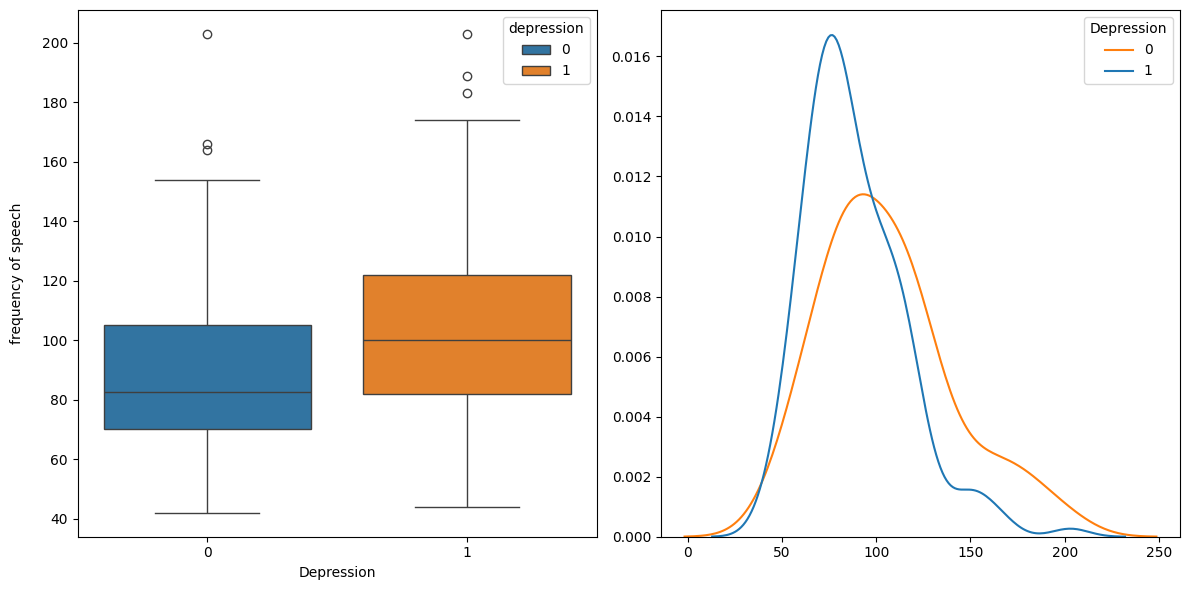

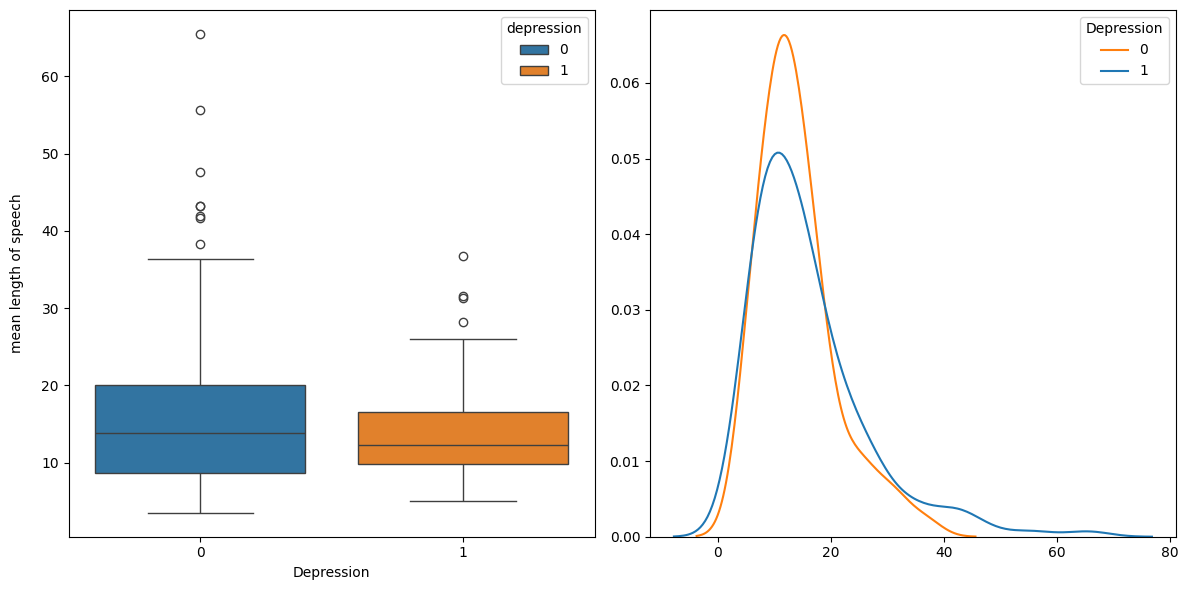

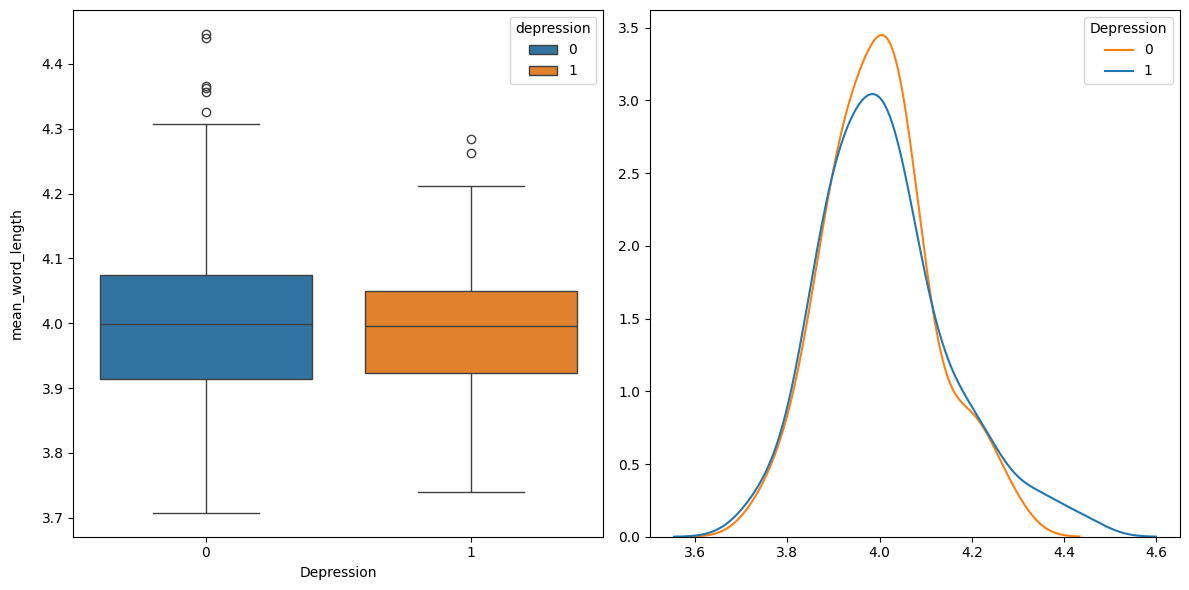

In [19]:
features = ['frequency of speech','mean length of speech','mean_word_length']
for feature in features:
    visualize(feature)

Further analysis of the speech of interviewees, it seem like there is a higher chance for interviewee with depression to have a shorter speech per times.

In the following I will try to normalise the text, and show the importance of normalisation 

In [20]:
import pandas as pd
import re

def find_apostrophe_words(text_list):
    # Regex pattern to find words with apostrophes
    pattern = r"\b\w+'(?:\w+|t)\b|\B'\w+\b"
    apo_terms = []  # Initialize an empty list to collect all terms
    for item in text_list:
        # Find all matches and extend them to the apo_terms list
        apo_terms.extend(re.findall(pattern, item))
    return apo_terms

# Assuming df_combined['flattened text'] contains lists of strings
all_words_with_apostrophes = [word for text in df_combined['flattened text'].dropna() for word in find_apostrophe_words(text)]

# Convert list to a set to remove duplicates, then back to list to print or use further
unique_words_with_apostrophes = list(set(all_words_with_apostrophes))

# Print unique words
print(unique_words_with_apostrophes)

["Bill's", "wasn't", "children's", "heart's", "it'll", "else's", "Brett's", "Frank's", "workman's", "city's", "aren't", "what's", "day's", "Let's", "bachelor's", "I'm", "Square's", "who's", "son's", "family's", "buddhism's", "night's", "master's", "that's", "party's", "Year's", "Oggi's", "mine's", "guy's", "Robinson's", "boyfriend's", "jango's", "Joey's", "Ellie's", "associate's", "body's", "we'll", "Japan's", "people's", "everything's", "mama's", "It's", "Eddie's", "I'd", "A's", "weather's", "there's", "friend's", "Simon's", "you'd", "Tennessee's", "who've", "Ernie's", "Django's", "back's", "Lord's", "dog's", "Father's", "Chili's", "you've", "we've", "other's", "isn't", "one's", "girl's", "Bachelor's", "Master's", "Dean's", "Alzheimer's", "law's", "Murphy's", "dad's", "baby's", "nephew's", "that'll", "y'all", "That's", "Mom's", "he's", "Lowe's", "Mexico's", "mom's", "What's", "woman's", "women's", "Life's", "couldn't", "can't", "Sandy's", "area's", "Alma's", "daughter's", "brother's",

In [21]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

def tokenize_and_flatten(text_list):
    tokenized_list = [tokenizer.tokenize(word) for word in text_list]
    # Flatten the list of lists into a single list
    flat_list = [item for sublist in tokenized_list for item in sublist]
    return flat_list

# Apply the tokenizer to the 'flattened text' column and store the results in a new column
df_combined['tokenized_text'] = df_combined['flattened text'].apply(tokenize_and_flatten)



In [22]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,..."
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th..."
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you..."
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh..."
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b..."


In [23]:
all_words_with_apostrophes = [word for text in df_combined['tokenized_text'].dropna() for word in find_apostrophe_words(text)]

# Convert list to a set to remove duplicates, then back to list to print or use further
unique_words_with_apostrophes = list(set(all_words_with_apostrophes))

# Print unique words
print(unique_words_with_apostrophes)

["'s", "ma'am", "'m", "'d", "'re", "Hold'em", "s'more", "I'ma", "n't", "y'alls", "'ll", "y'all", "'ve"]


In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
contractions_dict = {
    "'s": "is",     # depending on context, can also be 'has' or possessive marker
    "n't": "not",
    "'m": "am",
    "'d": "would",  # can also mean "had" depending on context
    "'ve": "have",
    "s'more": "some more" ,
    "Hold'em": "hold them",
    "y'alls": "you alls",
    "I'ma": "I am going to",
    "'ll": "will",
    "ma'am": "madam",
    "'re": "are",
    "y'all": "you all"
}

import pandas as pd

# Assume 'df_combined' is your DataFrame and contractions_dict is defined as provided

def expand_contractions(tokens, contractions_dict):
    expanded_tokens = []
    for token in tokens:
        # Check each token if it's a contraction
        if token.lower() in contractions_dict:
            # If it is, replace it with the expanded form
            expanded_tokens.extend(contractions_dict[token.lower()].split())
        else:
            # Otherwise, keep the token as is
            expanded_tokens.append(token)
    return expanded_tokens

# Apply this function to each row in the tokenized_text column
df_combined['expanded_text'] = df_combined['tokenized_text'].apply(lambda x: expand_contractions(x, contractions_dict))
df_combined['expanded_text']  =df_combined['expanded_text'].apply(lambda x: ' '.join(x))
df_combined['expanded_text'] = df_combined['expanded_text'].apply(lambda x: x.split())



In [26]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text,expanded_text
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,...","[so, I, am, going, to, interview, in, Spanish,..."
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th...","[yeah, there, is, also, on, Craigslist, so, th..."
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you...","[just, move, around, a, little, bit, when, you..."
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh...","[wow, okay, when, you, are, finished, when, sh..."
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b...","[so, we, will, just, move, around, a, little, ..."


In [27]:
# Save DataFrame to an Excel file
file_path = 'depression_detection_preprocessed.xlsx'  # specify the name of your file
df_combined.to_excel(file_path, index=False)  # index=False to avoid saving the DataFrame index

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


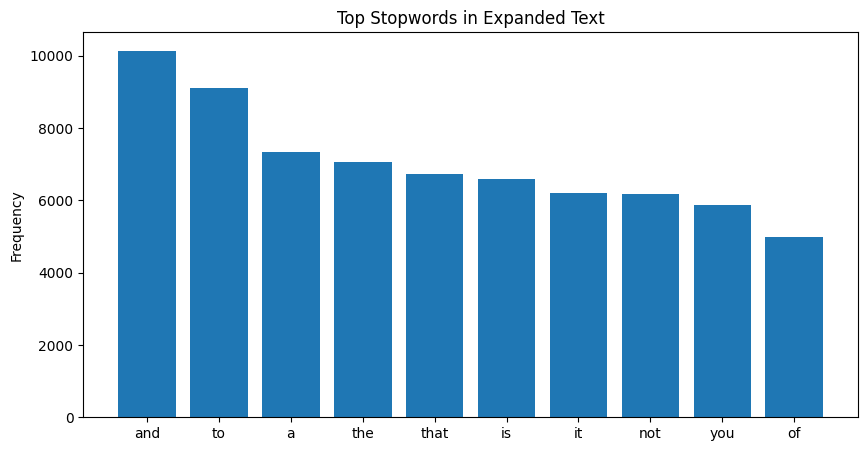

In [28]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict
import pandas as pd
import nltk

nltk.download('stopwords')

# Set up stopwords
stop = set(stopwords.words('english'))

# Assuming 'expanded_text' is already a list of words per document
# If 'expanded_text' is not a list of words, uncomment the following line:
# df_combined['expanded_text'] = df_combined['expanded_text'].apply(lambda x: x.split())

# Flatten the list of lists into a single list of words
corpus = [word for sublist in df_combined['expanded_text'] for word in sublist]

# Dictionary to count occurrences of each stopword
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

# Sorting the dictionary by frequency of stopwords and getting the top 10
top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
x, y = zip(*top)  # Unpack the top words and their counts

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.title('Top Stopwords in Expanded Text')
plt.ylabel('Frequency')
plt.show()



In [29]:
from collections import Counter

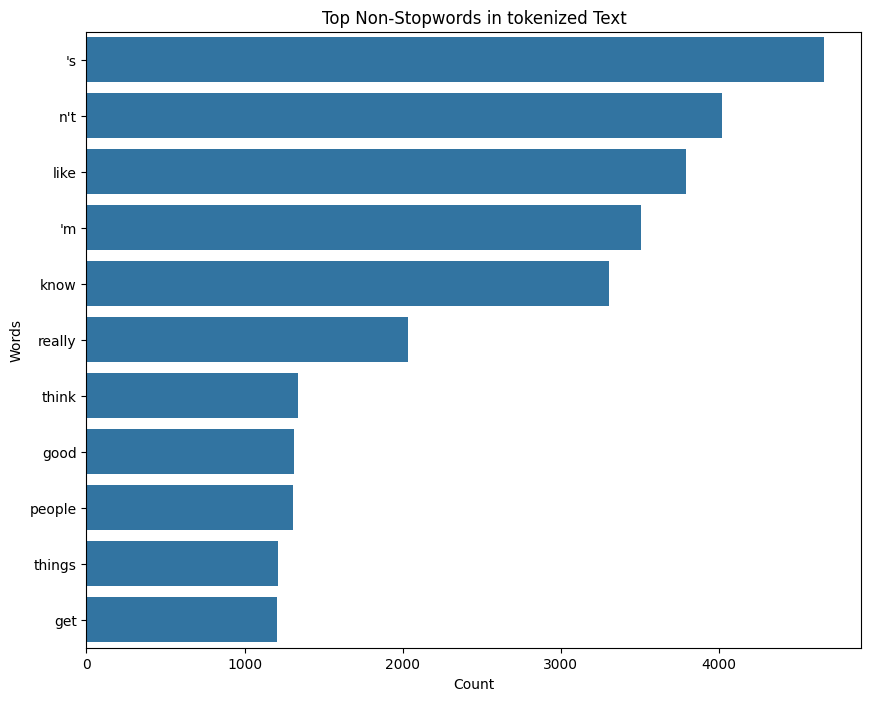

In [30]:
def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    
    # Flatten the list of lists into a single list if necessary
    # Assuming 'text' is a list of lists of words; if not, comment out the next two lines
    text = [word for sublist in text for word in sublist]
    
    counter = Counter(text)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:40]:
        if word.lower() not in stop:  # Check against stopwords using lowercased words
            x.append(word)
            y.append(count)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=y, y=x)
    plt.title('Top Non-Stopwords in tokenized Text')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

# Apply the function to the 'expanded_text' column
plot_top_non_stopwords_barchart(df_combined['tokenized_text'])


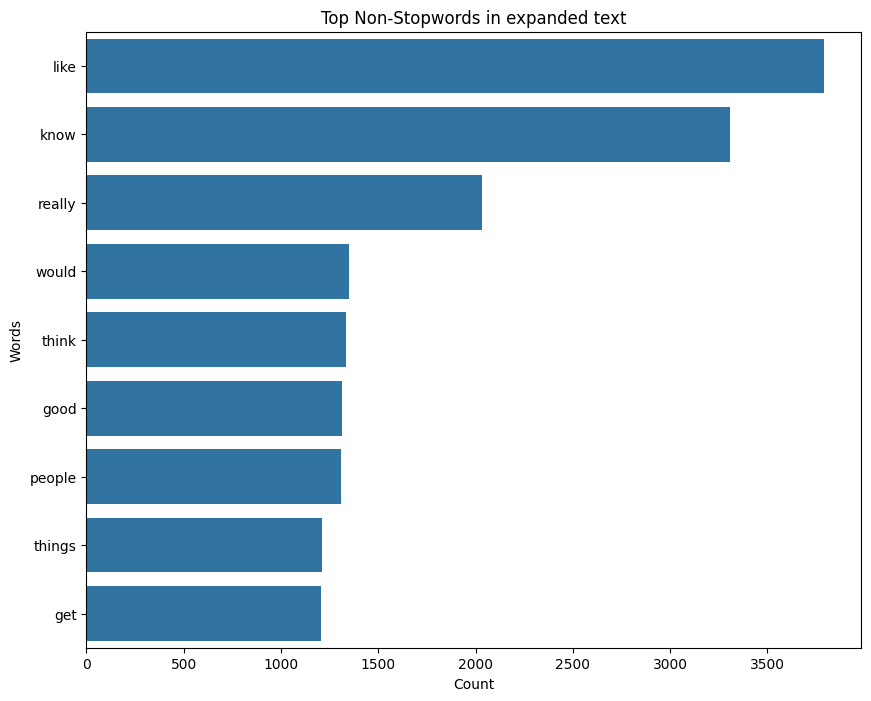

In [31]:
def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    
    # Flatten the list of lists into a single list if necessary
    # Assuming 'text' is a list of lists of words; if not, comment out the next two lines
    text = [word for sublist in text for word in sublist]
    
    counter = Counter(text)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:40]:
        if word.lower() not in stop:  # Check against stopwords using lowercased words
            x.append(word)
            y.append(count)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=y, y=x)
    plt.title('Top Non-Stopwords in expanded text')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

plot_top_non_stopwords_barchart(df_combined['expanded_text'])
    

# sentiment analysis

1. rule-based 
https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

In [32]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Function to apply VADER and return the compound score
def apply_vader(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

# Assuming 'expanded_text' column is a list of words, join them into a single string per row
df_combined['expanded_text_str'] = df_combined['expanded_text'].apply(lambda x: ' '.join(x))

# Apply the VADER analysis on the joined text
df_combined['vader_sentiment'] = df_combined['expanded_text_str'].apply(apply_vader)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
mean_vader_sentiment = df_combined.groupby('depression')[['vader_sentiment']].mean()

print(mean_vader_sentiment)

            vader_sentiment
depression                 
0                  0.971945
1                  0.920295


C:\Users\katja\AppData\Local\Temp\ipykernel_38144\2037503253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_vader_sentiment = df_combined.groupby('depression')[['vader_sentiment']].mean()


Both groups show relatively high average sentiment scores, which implies that, on average, the transcripts have positive sentiment regardless of depression label. However, the depression group (1) has a slightly lower mean score than the non-depression group (0), which might suggest a subtle trend towards less positive sentiment in the speech of individuals with depression.

Most Common Words and Word Cloud

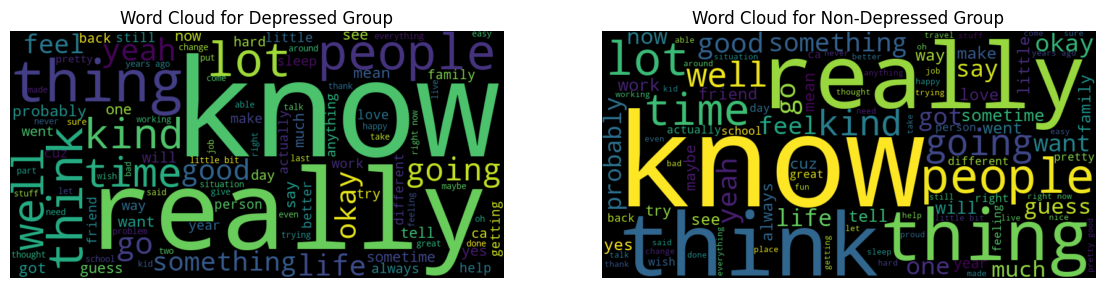

In [34]:
from collections import Counter
from wordcloud import WordCloud

# Separate text by depression label
depressed_text = ' '.join(df_combined[df_combined['depression'] == 1]['expanded_text_str'].tolist())
non_depressed_text = ' '.join(df_combined[df_combined['depression'] == 0]['expanded_text_str'].tolist())

# Generate word clouds
wordcloud_depressed = WordCloud(width=800, height=400, max_words=100).generate(depressed_text)
wordcloud_non_depressed = WordCloud(width=800, height=400, max_words=100).generate(non_depressed_text)

# Plot the word clouds side-by-side
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_depressed, interpolation='bilinear')
plt.title('Word Cloud for Depressed Group')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_depressed, interpolation='bilinear')
plt.title('Word Cloud for Non-Depressed Group')
plt.axis('off')

plt.show()

2. embedding model 

In [35]:
import flair # A natural language processing (NLP) library
# specific classes from the Flair library used for building and processing sentences
from flair.models import TextClassifier
from flair.data import Sentence

# Load the sentiment classifier
classifier = TextClassifier.load('en-sentiment')

# function takes a text input, converts it into a Sentence object, and predicts its sentiment using the loaded classifier
# It returns the sentiment label (e.g., "POSITIVE" or "NEGATIVE") and the associated confidence score (a float between 0 and 1) for that prediction
def flair_sentiment(text):
    # Make sure text is a string
    sentence = Sentence(text)
    classifier.predict(sentence)
    # Flair outputs labels with additional information, extracting sentiment and score
    return sentence.labels[0].value, sentence.labels[0].score

df_combined['flair_sentiment'], df_combined['flair_score'] = zip(*df_combined['expanded_text_str'].apply(flair_sentiment))

# View the DataFrame to see the added sentiment analysis results
print(df_combined[['expanded_text_str', 'flair_sentiment', 'flair_score']])

c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                     expanded_text_str flair_sentiment  \
0    so I am going to interview in Spanish okay goo...        NEGATIVE   
1    yeah there is also on Craigslist so that is wh...        POSITIVE   
2    just move around a little bit when you are fin...        POSITIVE   
3    wow okay when you are finished when she is don...        POSITIVE   
4    so we will just move around a little bit tonig...        NEGATIVE   
..                                                 ...             ...   
214  going to press that button it just means somet...        NEGATIVE   
215  hi I am not a therapist are you okay yes okay ...        POSITIVE   
216  and please are you okay with this yes doing fi...        NEGATIVE   
217  okay but but okay but I do not stop until it i...        NEGATIVE   
218  anime go ahead and start a fire camcorder reco...        NEGATIVE   

     flair_score  
0       0.898453  
1       0.830033  
2       0.613937  
3       0.989942  
4       0.990270

Interpretation
- Responses labeled as POSITIVE indicate that the text has an overall optimistic or favorable tone. These individuals may express feelings of hope, happiness, or contentment.
- Responses labeled as NEGATIVE reflect a pessimistic or unfavorable tone. This might include expressions of sadness, frustration, or hopelessness.
- flair_score: This column provides a confidence score for the sentiment prediction, indicating how certain the model is about its classification

Sentiment distribution

In [36]:
# Count the occurrences of each sentiment
sentiment_counts = df_combined['flair_sentiment'].value_counts()
total_count = len(df_combined)

# Calculate percentages
sentiment_percentage = (sentiment_counts / total_count) * 100

# Display results
print("Sentiment Distribution:")
print(sentiment_percentage)

Sentiment Distribution:
flair_sentiment
NEGATIVE    61.187215
POSITIVE    38.812785
Name: count, dtype: float64


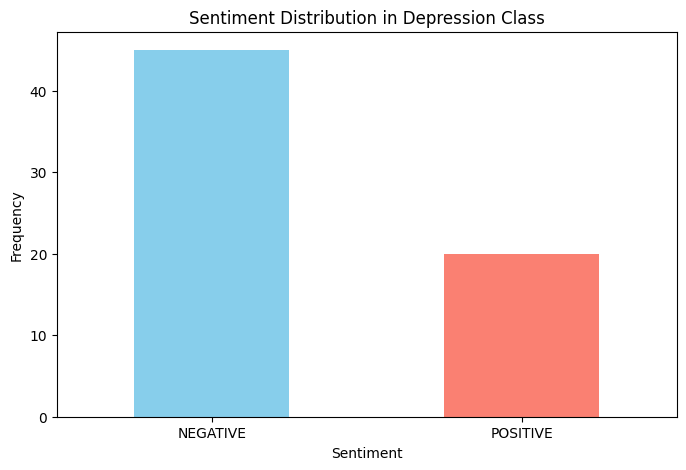

In [37]:
# Filter for rows where 'depression' is 1
depression_df = df_combined[df_combined['depression'] == 1]

# Count the occurrences of each sentiment within the depression class
sentiment_counts = depression_df['flair_sentiment'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sentiment Distribution in Depression Class')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Comparing sentiment by depression label

C:\Users\katja\AppData\Local\Temp\ipykernel_38144\4115694601.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sentiment = sentiment_by_depression.groupby('depression')['flair_score'].mean()


Mean Sentiment Scores by Depression Label:
depression
0    0.871376
1    0.892106
Name: flair_score, dtype: float64


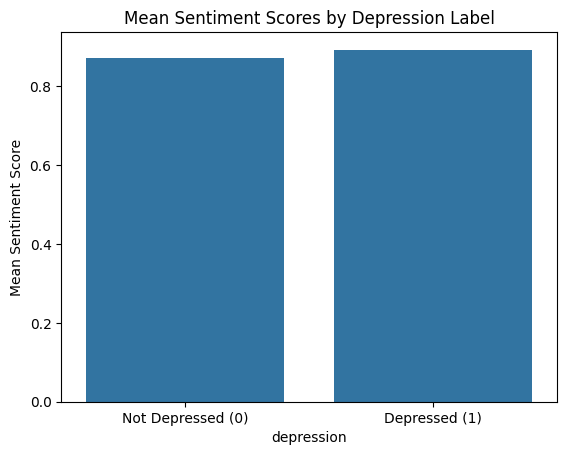

In [38]:
# Create a new DataFrame with sentiment scores and depression labels
sentiment_by_depression = df_combined[['depression', 'flair_score']]

# Calculate mean sentiment scores by depression label
mean_sentiment = sentiment_by_depression.groupby('depression')['flair_score'].mean()

# Display mean sentiment scores
print("Mean Sentiment Scores by Depression Label:")
print(mean_sentiment)

# Visualize the results
sns.barplot(x=mean_sentiment.index, y=mean_sentiment.values)
plt.xticks([0, 1], ['Not Depressed (0)', 'Depressed (1)'])
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Scores by Depression Label')
plt.show()

Both groups (depressed and not depressed) exhibit high mean sentiment scores, indicating that the language used in their responses leans towards positivity. This could suggest that even individuals experiencing depression may still express positive sentiments in certain contexts or discussions.

The mean sentiment score for the depressed group (0.892106) is higher than that of the non-depressed group (0.871376). This might seem counterintuitive because one would typically expect those who are depressed to express more negative sentiments. However, it could indicate that the topics discussed or the context of the interviews elicited positive responses even from those with depression.

In [39]:
import torch
print(torch.__version__)

2.5.0+cpu


### Emotion detection
- Aim: to identify and categorize the specific emotions expressed in text
- can classify text into multiple emotional categories (e.g. happiness, sadness, anger, fear, surprise, and disgust)
- eight primary emotions found in a paper: joy, trust, fear, surprise, sadness, aversion, anger, and anticipation

Steps for emotion detection
- choose a pre-trained model (e.g. model in the Huggung Face transformers library)
- prepare text data (if not already done) -> cleaning, tokenizing, converting in appropriate format
- apply the model
- analyze the results
    - the output typically includes a predicted emotion (dominant emotion detected in the text) and a confidence score (between 0 and 1, indicating the model's confidence in its prediction)

In [40]:
from transformers import pipeline, AutoTokenizer

# Load an emotion detection model
emotion_classifier = pipeline("text-classification", model="nateraw/bert-base-uncased-emotion")
tokenizer = AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion")

def split_text(text, max_length=512):
    # Tokenize the text to get the token count
    tokens = tokenizer.encode(text, truncation=False)
    segments = []

    # Split the tokens into segments based on the maximum length
    for i in range(0, len(tokens), max_length):
        segment_tokens = tokens[i:i + max_length]
        # Decode the token segment back to string
        segments.append(tokenizer.decode(segment_tokens, skip_special_tokens=True))

    return segments

def detect_emotion(text):
    segments = split_text(text)
    emotions = []
    
    # Collect results from all segments
    for segment in segments:
        # Ensure that we only classify segments within the limit
        if len(tokenizer.encode(segment)) <= 512 and segment.strip():
            emotions.extend(emotion_classifier(segment))
    return emotions

# Apply emotion detection to your data
try:
    df_combined['emotion'] = df_combined['expanded_text_str'].apply(detect_emotion)
except RuntimeError as e:
    print(f"An error occurred during emotion detection: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Check if 'emotion' column was created before trying to print it
if 'emotion' in df_combined.columns:
    print(df_combined[['expanded_text_str', 'emotion']])
else:
    print("The 'emotion' column was not created successfully.")


                                     expanded_text_str  \
0    so I am going to interview in Spanish okay goo...   
1    yeah there is also on Craigslist so that is wh...   
2    just move around a little bit when you are fin...   
3    wow okay when you are finished when she is don...   
4    so we will just move around a little bit tonig...   
..                                                 ...   
214  going to press that button it just means somet...   
215  hi I am not a therapist are you okay yes okay ...   
216  and please are you okay with this yes doing fi...   
217  okay but but okay but I do not stop until it i...   
218  anime go ahead and start a fire camcorder reco...   

                                               emotion  
0    [{'label': 'anger', 'score': 0.7366102933883667}]  
1      [{'label': 'joy', 'score': 0.9923581480979919}]  
2     [{'label': 'love', 'score': 0.5547837615013123}]  
3      [{'label': 'joy', 'score': 0.9932920932769775}]  
4      [{'label': 

Emotion frequencies

emotion
joy         164
sadness      25
anger        13
love         11
surprise      3
fear          3
Name: count, dtype: int64


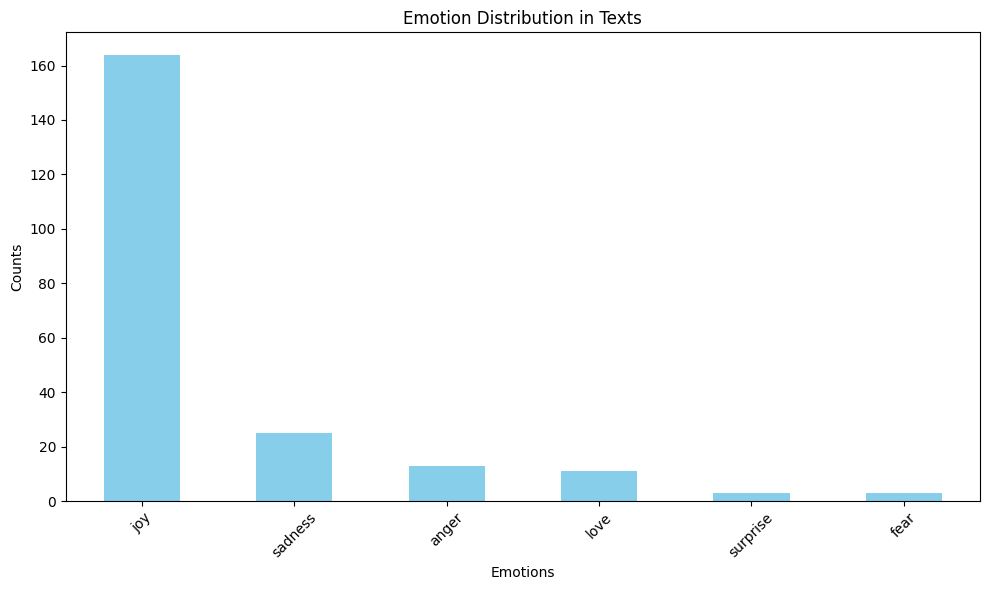

In [41]:
# Extract the most confident emotion from each entry
# Flattening the emotions into a list of (label, score) pairs
emotion_labels = []
for entry in df_combined['emotion']:
    if entry:  # Check if the emotion entry is not empty
        # Get the most confident emotion label (the first one in the list)
        label = entry[0]['label']
        emotion_labels.append(label)

# Create a DataFrame from the labels
emotion_df = pd.DataFrame(emotion_labels, columns=['emotion'])

# Count the frequency of each emotion
emotion_counts = emotion_df['emotion'].value_counts()

# Display the counts
print(emotion_counts)

# Plot the emotion counts
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution in Texts')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

### Topic modeling
- technique used to discover abstract topics within a collection of documents
- helps in understanding what themes or subjects are present in the text data without requiring labels for the data

Steps
- Preprocess the text: Clean the text data by tokenizing, removing stop words, and stemming/lemmatization
- Create a dictionary and corpus: A dictionary maps each word to a unique ID, while a corpus represents the texts as bag-of-words (frequency of each word in each document)
- Apply a topic modeling algorithm: Use an algorithm like Latent Dirichlet Allocation (LDA) to find topics in the corpus. LDA assumes that each document is a mixture of topics and each topic is a mixture of words.
- Analyze the topics: Review the generated topics, which typically consist of the most frequent words associated with each topic.

In [42]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import nltk

# Ensure you have NLTK stopwords downloaded
nltk.download('stopwords')

# Example pre-processing function
def preprocess_text(text):
    # Tokenize, remove stop words, and lowercase
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
    return tokens

# Preprocess your texts
df_combined['tokens'] = df_combined['expanded_text_str'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df_combined['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_combined['tokens']]

# Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.017*"like" + 0.016*"really" + 0.014*"know" + 0.010*"people" + 0.010*"think" + 0.009*"time" + 0.009*"get" + 0.009*"good" + 0.009*"would" + 0.008*"things"
Topic 1: 0.023*"like" + 0.022*"know" + 0.019*"really" + 0.012*"think" + 0.011*"good" + 0.011*"would" + 0.010*"lot" + 0.010*"well" + 0.009*"people" + 0.009*"okay"
Topic 2: 0.022*"know" + 0.013*"like" + 0.008*"good" + 0.008*"got" + 0.008*"get" + 0.007*"go" + 0.007*"people" + 0.007*"really" + 0.007*"okay" + 0.006*"lot"
Topic 3: 0.057*"like" + 0.036*"know" + 0.012*"yeah" + 0.012*"really" + 0.012*"would" + 0.010*"kind" + 0.008*"good" + 0.008*"people" + 0.008*"think" + 0.008*"get"
Topic 4: 0.027*"know" + 0.026*"like" + 0.012*"people" + 0.012*"things" + 0.010*"really" + 0.010*"get" + 0.009*"good" + 0.008*"would" + 0.008*"go" + 0.008*"lot"


### Symptoms detection
similar to emotion detection

In [43]:
# Define symptoms
symptoms = [
    "sadness", "pessimism", "past failure", "loss of pleasure", "guilty feeling", 
    "punishment feeling", "self-dislike", "self-criticalness", "suicidal thoughts", 
    "crying", "agitation", "loss of interest", "indecisiveness", "worthlessness", 
    "loss of energy", "changes in sleeping pattern", "irritability", "changes in appetite", 
    "concentration difficulty", "tiredness"
]

# Function to detect symptoms
def detect_symptoms(text):
    detected_symptoms = []
    for symptom in symptoms:
        if symptom in text.lower():  # Convert to lowercase for case insensitive matching
            detected_symptoms.append(symptom)
    return detected_symptoms

# Apply symptom detection to your data
df_combined['detected_symptoms'] = df_combined['expanded_text_str'].apply(detect_symptoms)

# View the results
print(df_combined[['expanded_text_str', 'detected_symptoms']])

                                     expanded_text_str detected_symptoms
0    so I am going to interview in Spanish okay goo...                []
1    yeah there is also on Craigslist so that is wh...                []
2    just move around a little bit when you are fin...                []
3    wow okay when you are finished when she is don...                []
4    so we will just move around a little bit tonig...                []
..                                                 ...               ...
214  going to press that button it just means somet...                []
215  hi I am not a therapist are you okay yes okay ...                []
216  and please are you okay with this yes doing fi...                []
217  okay but but okay but I do not stop until it i...    [irritability]
218  anime go ahead and start a fire camcorder reco...                []

[219 rows x 2 columns]


        Symptom  Count
0        crying      8
1       sadness      4
2  irritability      1


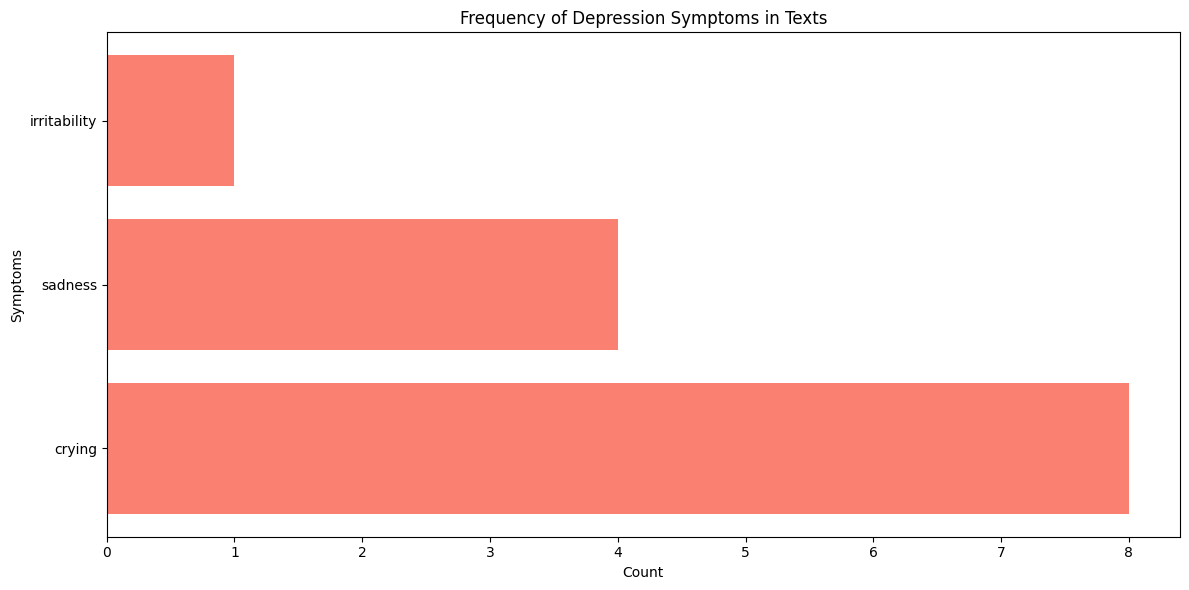

In [44]:
# Visualization of results
# Count occurrences of each symptom
symptom_counts = {}

# Aggregate counts
for symptoms_list in df_combined['detected_symptoms']:
    for symptom in symptoms_list:
        if symptom in symptom_counts:
            symptom_counts[symptom] += 1
        else:
            symptom_counts[symptom] = 1

# Convert to DataFrame for better visualization
symptom_counts_df = pd.DataFrame(list(symptom_counts.items()), columns=['Symptom', 'Count'])

# Display the counts
print(symptom_counts_df)

# Plot the symptom counts
plt.figure(figsize=(12, 6))
symptom_counts_df.sort_values('Count', ascending=False, inplace=True)  # Sort by count
plt.barh(symptom_counts_df['Symptom'], symptom_counts_df['Count'], color='salmon')
plt.title('Frequency of Depression Symptoms in Texts')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.tight_layout()  # Adjust layout
plt.show()

### Average Noun, Verbs, Adjectives, Adverbs

In [45]:
from nltk import pos_tag

# Ensure you have the required resources
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [46]:
# Function to Calculate Average Frequency
def calculate_average_frequency(df, tokens_column):
    # Initialize counters
    total_nouns = 0
    total_verbs = 0
    total_adjectives = 0
    total_adverbs = 0
    
    # Iterate over each list of tokens
    for tokens in df[tokens_column]:
        # Perform POS tagging on the tokens
        pos_tags = pos_tag(tokens)
        
        # Count frequencies
        nouns = sum(1 for _, pos in pos_tags if pos.startswith('NN'))
        verbs = sum(1 for _, pos in pos_tags if pos.startswith('VB'))
        adjectives = sum(1 for _, pos in pos_tags if pos.startswith('JJ'))
        adverbs = sum(1 for _, pos in pos_tags if pos.startswith('RB'))
        
        total_nouns += nouns
        total_verbs += verbs
        total_adjectives += adjectives
        total_adverbs += adverbs
    
    # Calculate averages
    num_responses = len(df)
    average_nouns = total_nouns / num_responses
    average_verbs = total_verbs / num_responses
    average_adjectives = total_adjectives / num_responses
    average_adverbs = total_adverbs / num_responses
    
    return {
        'Average Nouns': average_nouns,
        'Average Verbs': average_verbs,
        'Average Adjectives': average_adjectives,
        'Average Adverbs': average_adverbs
    }

# Calculate the average frequencies
average_frequencies = calculate_average_frequency(df_combined, 'expanded_text')
average_df = pd.DataFrame(list(average_frequencies.items()), columns=['Part of Speech', 'Average Frequency'])

# Display the DataFrame
print(average_df)

       Part of Speech  Average Frequency
0       Average Nouns         218.178082
1       Average Verbs         323.593607
2  Average Adjectives          96.835616
3     Average Adverbs         140.392694


In [47]:
def calculate_row_average_frequencies(df, tokens_column):
    # Lists to hold average frequencies for each row
    avg_nouns = []
    avg_verbs = []
    avg_adjectives = []
    avg_adverbs = []
    
    # Iterate over each list of tokens
    for tokens in df[tokens_column]:
        # Perform POS tagging on the tokens
        pos_tags = pos_tag(tokens)
        
        # Total counts for this row
        nouns_count = sum(1 for _, pos in pos_tags if pos.startswith('NN'))  # Noun tags: NN, NNS, NNP, NNPS
        verbs_count = sum(1 for _, pos in pos_tags if pos.startswith('VB'))   # Verb tags: VB, VBD, VBG, VBN, VBP, VBZ
        adjectives_count = sum(1 for _, pos in pos_tags if pos.startswith('JJ'))  # Adjective tags: JJ, JJR, JJS
        adverbs_count = sum(1 for _, pos in pos_tags if pos.startswith('RB'))  # Adverb tags: RB, RBR, RBS
        
        # Total number of tokens
        total_tokens = len(tokens) if len(tokens) > 0 else 1  # Avoid division by zero
        
        # Calculate averages for this row
        avg_nouns.append(nouns_count / total_tokens)
        avg_verbs.append(verbs_count / total_tokens)
        avg_adjectives.append(adjectives_count / total_tokens)
        avg_adverbs.append(adverbs_count / total_tokens)
    
    # Add the averages to the DataFrame
    df['Average Nouns'] = avg_nouns
    df['Average Verbs'] = avg_verbs
    df['Average Adjectives'] = avg_adjectives
    df['Average Adverbs'] = avg_adverbs
    
    return df

# Calculate the average frequencies for each row
df_with_averages = calculate_row_average_frequencies(df_combined, 'expanded_text')

In [48]:
# Display the updated DataFrame
df_with_averages.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text,expanded_text,...,vader_sentiment,flair_sentiment,flair_score,emotion,tokens,detected_symptoms,Average Nouns,Average Verbs,Average Adjectives,Average Adverbs
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,...","[so, I, am, going, to, interview, in, Spanish,...",...,0.9988,NEGATIVE,0.898453,"[{'label': 'anger', 'score': 0.7366102933883667}]","[going, interview, spanish, okay, good, atlant...",[],0.197015,0.226866,0.074627,0.095522
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th...","[yeah, there, is, also, on, Craigslist, so, th...",...,0.9997,POSITIVE,0.830033,"[{'label': 'joy', 'score': 0.9923581480979919}]","[yeah, also, craigslist, okay, today, good, th...",[],0.117490,0.241656,0.064085,0.139519
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you...","[just, move, around, a, little, bit, when, you...",...,0.9992,POSITIVE,0.613937,"[{'label': 'love', 'score': 0.5547837615013123}]","[move, around, little, bit, finished, today, f...",[],0.209857,0.197138,0.081081,0.092210
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh...","[wow, okay, when, you, are, finished, when, sh...",...,0.9999,POSITIVE,0.989942,"[{'label': 'joy', 'score': 0.9932920932769775}]","[wow, okay, finished, done, okay, thank, today...",[],0.139027,0.242304,0.067527,0.081927
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b...","[so, we, will, just, move, around, a, little, ...",...,0.9992,NEGATIVE,0.990270,"[{'label': 'joy', 'score': 0.9953933954238892}]","[move, around, little, bit, tonight, xbox, kin...",[],0.138227,0.222116,0.069590,0.111535


### Average of First-Person Related Words

In [49]:
def calculate_first_person_average_frequency(df, tokens_column):
    # List of first-person pronouns
    first_person_pronouns = ['i','I', 'me', 'Me', 'my', 'My', 'mine', 'Mine', 'we', 'We', 'us', 'Us', 'our', 'Our', 'ours', 'Ours']
    
    # List to hold average frequencies for each row
    avg_fp_frequencies = []
    
    # Iterate over each list of tokens
    for tokens in df[tokens_column]:
        # Count the first-person pronouns in the current row
        fp_count = sum(1 for token in tokens if token.lower() in first_person_pronouns)
        
        # Total number of tokens
        total_tokens = len(tokens) if len(tokens) > 0 else 1  # Avoid division by zero
        
        # Calculate average frequency of first-person pronouns for this row
        avg_fp_frequencies.append(fp_count / total_tokens)
    
    # Add the averages to the DataFrame
    df['Average First-Person Frequency'] = avg_fp_frequencies
    
    return df

# Calculate the average first-person frequencies for each row
df_with_fp_avg = calculate_first_person_average_frequency(df_combined, 'expanded_text')

# Display the updated DataFrame showing expanded text and average first-person frequency
print(df_with_fp_avg['Average First-Person Frequency'])

0      0.113433
1      0.106809
2      0.065183
3      0.073982
4      0.102002
         ...   
214    0.106124
215    0.095168
216    0.066253
217    0.096774
218    0.088112
Name: Average First-Person Frequency, Length: 219, dtype: float64


In [50]:
df_with_fp_avg

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text,expanded_text,...,flair_sentiment,flair_score,emotion,tokens,detected_symptoms,Average Nouns,Average Verbs,Average Adjectives,Average Adverbs,Average First-Person Frequency
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,...","[so, I, am, going, to, interview, in, Spanish,...",...,NEGATIVE,0.898453,"[{'label': 'anger', 'score': 0.7366102933883667}]","[going, interview, spanish, okay, good, atlant...",[],0.197015,0.226866,0.074627,0.095522,0.113433
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th...","[yeah, there, is, also, on, Craigslist, so, th...",...,POSITIVE,0.830033,"[{'label': 'joy', 'score': 0.9923581480979919}]","[yeah, also, craigslist, okay, today, good, th...",[],0.117490,0.241656,0.064085,0.139519,0.106809
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you...","[just, move, around, a, little, bit, when, you...",...,POSITIVE,0.613937,"[{'label': 'love', 'score': 0.5547837615013123}]","[move, around, little, bit, finished, today, f...",[],0.209857,0.197138,0.081081,0.092210,0.065183
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh...","[wow, okay, when, you, are, finished, when, sh...",...,POSITIVE,0.989942,"[{'label': 'joy', 'score': 0.9932920932769775}]","[wow, okay, finished, done, okay, thank, today...",[],0.139027,0.242304,0.067527,0.081927,0.073982
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b...","[so, we, will, just, move, around, a, little, ...",...,NEGATIVE,0.990270,"[{'label': 'joy', 'score': 0.9953933954238892}]","[move, around, little, bit, tonight, xbox, kin...",[],0.138227,0.222116,0.069590,0.111535,0.102002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,698,"[[going, to, press, that, button, it, just, me...",1,"[16, 1, 3, 3, 1, 1, 4, 2, 1, 1, 1, 5, 25, 4, 6...",139,17.863309,"[going, to, press, that, button, it, just, mea...",3.985904,"[going, to, press, that, button, it, just, mea...","[going, to, press, that, button, it, just, mea...",...,NEGATIVE,0.976905,"[{'label': 'joy', 'score': 0.9336299300193787}]","[going, press, button, means, something, went,...",[],0.151388,0.246482,0.071510,0.079498,0.106124
215,702,"[[hi], [I'm, not, a, therapist], [are, you, ok...",0,"[1, 4, 3, 1, 1, 7, 3, 2, 23, 9, 2, 8, 5, 3, 18...",86,7.674419,"[hi, I'm, not, a, therapist, are, you, okay, y...",3.998485,"[hi, I, 'm, not, a, therapist, are, you, okay,...","[hi, I, am, not, a, therapist, are, you, okay,...",...,POSITIVE,0.923048,"[{'label': 'joy', 'score': 0.9960112571716309}]","[hi, therapist, okay, yes, okay, today, good, ...",[],0.165447,0.231332,0.068814,0.071742,0.095168
216,703,"[[and, please], [are, you, okay, with, this, y...",0,"[2, 6, 5, 2, 2, 2, 4, 2, 5, 4, 4, 3, 1, 3, 5, ...",83,5.614458,"[and, please, are, you, okay, with, this, yes,...",4.268240,"[and, please, are, you, okay, with, this, yes,...","[and, please, are, you, okay, with, this, yes,...",...,NEGATIVE,0.724067,"[{'label': 'joy', 'score': 0.9602513313293457}]","[p

In [51]:
# Function to calculate speech speed
def calculate_speech_speed(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Calculate the total duration in seconds for the participant (End_Time - Start_Time)
    total_duration = (df['End_Time'] - df['Start_Time']).sum()
    
    # Calculate the total number of words spoken (assuming the text column is named 'Text')
    total_words = df['Text'].str.split().apply(len).sum()
    
    # Avoid division by zero (in case of no spoken words or zero duration)
    if total_duration == 0:
        return np.nan
    else:
        return total_words / total_duration

# List to store participant speech speeds
speech_speeds = []

# Iterate over each file in the directory
for file_name in os.listdir(directory):
    if file_name.endswith('.csv'):
        # Get the full path of the CSV file
        file_path = os.path.join(directory, file_name)
        
        # Assuming the participant ID is in the file name (if not, adjust this as needed)
        participant_id = file_name.split('.')[0]  # Extracting participant ID from file name
        
        # Calculate the speech speed for this participant (unit: words/sec)
        speech_speed = calculate_speech_speed(file_path)
        
        # Append the result to the speech_speeds list
        speech_speeds.append({
            'Participant_ID': participant_id,
            'Speech_Speed': speech_speed
        })

# Convert the list to a DataFrame
df_temporary_speed = pd.DataFrame(speech_speeds)
df_final = pd.concat([df_combined, df_temporary_speed], axis = 1).drop(columns = ["Participant_ID"])

df_final

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text,expanded_text,...,flair_score,emotion,tokens,detected_symptoms,Average Nouns,Average Verbs,Average Adjectives,Average Adverbs,Average First-Person Frequency,Speech_Speed
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,...","[so, I, am, going, to, interview, in, Spanish,...",...,0.898453,"[{'label': 'anger', 'score': 0.7366102933883667}]","[going, interview, spanish, okay, good, atlant...",[],0.197015,0.226866,0.074627,0.095522,0.113433,0.423796
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th...","[yeah, there, is, also, on, Craigslist, so, th...",...,0.830033,"[{'label': 'joy', 'score': 0.9923581480979919}]","[yeah, also, craigslist, okay, today, good, th...",[],0.117490,0.241656,0.064085,0.139519,0.106809,1.058485
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you...","[just, move, around, a, little, bit, when, you...",...,0.613937,"[{'label': 'love', 'score': 0.5547837615013123}]","[move, around, little, bit, finished, today, f...",[],0.209857,0.197138,0.081081,0.092210,0.065183,0.625064
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh...","[wow, okay, when, you, are, finished, when, sh...",...,0.989942,"[{'label': 'joy', 'score': 0.9932920932769775}]","[wow, okay, finished, done, okay, thank, today...",[],0.139027,0.242304,0.067527,0.081927,0.073982,1.196229
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b...","[so, we, will, just, move, around, a, little, ...",...,0.990270,"[{'label': 'joy', 'score': 0.9953933954238892}]","[move, around, little, bit, tonight, xbox, kin...",[],0.138227,0.222116,0.069590,0.111535,0.102002,0.868119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,698,"[[going, to, press, that, button, it, just, me...",1,"[16, 1, 3, 3, 1, 1, 4, 2, 1, 1, 1, 5, 25, 4, 6...",139,17.863309,"[going, to, press, that, button, it, just, mea...",3.985904,"[going, to, press, that, button, it, just, mea...","[going, to, press, that, button, it, just, mea...",...,0.976905,"[{'label': 'joy', 'score': 0.9336299300193787}]","[going, press, button, means, something, went,...",[],0.151388,0.246482,0.071510,0.079498,0.106124,2.871184
215,702,"[[hi], [I'm, not, a, therapist], [are, you, ok...",0,"[1, 4, 3, 1, 1, 7, 3, 2, 23, 9, 2, 8, 5, 3, 18...",86,7.674419,"[hi, I'm, not, a, therapist, are, you, okay, y...",3.998485,"[hi, I, 'm, not, a, therapist, are, you, okay,...","[hi, I, am, not, a, therapist, are, you, okay,...",...,0.923048,"[{'label': 'joy', 'score': 0.9960112571716309}]","[hi, therapist, okay, yes, okay, today, good, ...",[],0.165447,0.231332,0.068814,0.071742,0.095168,2.766136
216,703,"[[and, please], [are, you, okay, with, this, y...",0,"[2, 6, 5, 2, 2, 2, 4, 2, 5, 4, 4, 3, 1, 3, 5, ...",83,5.614458,"[and, please, are, you, okay, with, this, yes,...",4.268240,"[and, please, are, you, okay, with, this, yes,...","[and, please, are, you, okay, with, this, yes,...",...,0.724067,"[{'label': 'joy', 'score': 0.9602513313293457}]","[please, okay,

Unique Words Frequency

In [52]:
def calculate_unique_words(row):
    # Convert each word to lowercase to avoid case-sensitivity issues
    lowercased_words = [word.lower() for word in row]
    # Convert the list of words to a set to get unique words
    unique_words = set(lowercased_words)
    # Return the count of unique words
    return len(unique_words)

# Apply the function to each row in 'Expanded Text' to create a new column with unique word counts
df_final['Unique Word Count'] = df_final['expanded_text'].apply(calculate_unique_words)

# Calculate the average unique word count across all rows
average_unique_words = df_final['Unique Word Count'].mean()

# Add the average as a new row or column if needed
print(f"Average Unique Word Count: {average_unique_words}")
print("\nDataFrame with Unique Word Count:")
df_final

Average Unique Word Count: 400.013698630137

DataFrame with Unique Word Count:


,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text,expanded_text,...,emotion,tokens,detected_symptoms,Average Nouns,Average Verbs,Average Adjectives,Average Adverbs,Average First-Person Frequency,Speech_Speed,Unique Word Count
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,...","[so, I, am, going, to, interview, in, Spanish,...",...,"[{'label': 'anger', 'score': 0.7366102933883667}]","[going, interview, spanish, okay, good, atlant...",[],0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th...","[yeah, there, is, also, on, Craigslist, so, th...",...,"[{'label': 'joy', 'score': 0.9923581480979919}]","[yeah, also, craigslist, okay, today, good, th...",[],0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you...","[just, move, around, a, little, bit, when, you...",...,"[{'label': 'love', 'score': 0.5547837615013123}]","[move, around, little, bit, finished, today, f...",[],0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh...","[wow, okay, when, you, are, finished, when, sh...",...,"[{'label': 'joy', 'score': 0.9932920932769775}]","[wow, okay, finished, done, okay, thank, today...",[],0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b...","[so, we, will, just, move, around, a, little, ...",...,"[{'label': 'joy', 'score': 0.9953933954238892}]","[move, around, little, bit, tonight, xbox, kin...",[],0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,698,"[[going, to, press, that, button, it, just, me...",1,"[16, 1, 3, 3, 1, 1, 4, 2, 1, 1, 1, 5, 25, 4, 6...",139,17.863309,"[going, to, press, that, button, it, just, mea...",3.985904,"[going, to, press, that, button, it, just, mea...","[going, to, press, that, button, it, just, mea...",...,"[{'label': 'joy', 'score': 0.9336299300193787}]","[going, press, button, means, something, went,...",[],0.151388,0.246482,0.071510,0.079498,0.106124,2.871184,562
215,702,"[[hi], [I'm, not, a, therapist], [are, you, ok...",0,"[1, 4, 3, 1, 1, 7, 3, 2, 23, 9, 2, 8, 5, 3, 18...",86,7.674419,"[hi, I'm, not, a, therapist, are, you, okay, y...",3.998485,"[hi, I, 'm, not, a, therapist, are, you, okay,...","[hi, I, am, not, a, therapist, are, you, okay,...",...,"[{'label': 'joy', 'score': 0.9960112571716309}]","[hi, therapist, okay, yes, okay, today, good, ...",[],0.165447,0.231332,0.068814,0.071742,0.095168,2.766136,253
216,703,"[[and, please], [are, you, okay, with, this, y...",0,"[2, 6, 5, 2, 2, 2, 4, 2, 5, 4, 4, 3, 1, 3, 5, ...",83,5.614458,"[and, please, are, you, okay, with, this, yes,...",4.268240,"[and, please, are, you, okay, with, this, yes,...","[and, please, are, you, okay, with, this, yes,...",...,"[{'label': 'joy', 'score': 0.9602513313293457}]","[please, okay, yes, fine, memphis, tennessee, ...",[

Stop words Frequency (without custom stop words like uh, mh, umh...)

In [53]:
# Set of stop words in English
stop_words = set(stopwords.words("english"))

# Function to calculate stop word frequency
def calculate_stop_word_frequency(row):
    # Lowercase all words for consistency
    lowercased_words = [word.lower() for word in row]
    # Count the frequency of stop words
    stop_word_count = sum(1 for word in lowercased_words if word in stop_words)
    # Return the count of stop words
    return stop_word_count

# Apply the function to each row in 'expanded_text'
df_final['Stop Word Frequency'] = df_final['expanded_text'].apply(calculate_stop_word_frequency)

# Calculate average across all rows
average_stop_words = df_final['Stop Word Frequency'].mean()

# Print the results
print(f"Average Stop Word Frequency: {average_stop_words}")
df_final

Average Stop Word Frequency: 833.2876712328767


,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text,expanded_text,...,tokens,detected_symptoms,Average Nouns,Average Verbs,Average Adjectives,Average Adverbs,Average First-Person Frequency,Speech_Speed,Unique Word Count,Stop Word Frequency
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,...","[so, I, am, going, to, interview, in, Spanish,...",...,"[going, interview, spanish, okay, good, atlant...",[],0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th...","[yeah, there, is, also, on, Craigslist, so, th...",...,"[yeah, also, craigslist, okay, today, good, th...",[],0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you...","[just, move, around, a, little, bit, when, you...",...,"[move, around, little, bit, finished, today, f...",[],0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh...","[wow, okay, when, you, are, finished, when, sh...",...,"[wow, okay, finished, done, okay, thank, today...",[],0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b...","[so, we, will, just, move, around, a, little, ...",...,"[move, around, little, bit, tonight, xbox, kin...",[],0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,698,"[[going, to, press, that, button, it, just, me...",1,"[16, 1, 3, 3, 1, 1, 4, 2, 1, 1, 1, 5, 25, 4, 6...",139,17.863309,"[going, to, press, that, button, it, just, mea...",3.985904,"[going, to, press, that, button, it, just, mea...","[going, to, press, that, button, it, just, mea...",...,"[going, press, button, means, something, went,...",[],0.151388,0.246482,0.071510,0.079498,0.106124,2.871184,562,1541
215,702,"[[hi], [I'm, not, a, therapist], [are, you, ok...",0,"[1, 4, 3, 1, 1, 7, 3, 2, 23, 9, 2, 8, 5, 3, 18...",86,7.674419,"[hi, I'm, not, a, therapist, are, you, okay, y...",3.998485,"[hi, I, 'm, not, a, therapist, are, you, okay,...","[hi, I, am, not, a, therapist, are, you, okay,...",...,"[hi, therapist, okay, yes, okay, today, good, ...",[],0.165447,0.231332,0.068814,0.071742,0.095168,2.766136,253,391
216,703,"[[and, please], [are, you, okay, with, this, y...",0,"[2, 6, 5, 2, 2, 2, 4, 2, 5, 4, 4, 3, 1, 3, 5, ...",83,5.614458,"[and, please, are, you, okay, with, this, yes,...",4.268240,"[and, please, are, you, okay, with, this, yes,...","[and, please, are, you, okay, with, this, yes,...",...,"[please, okay, yes, fine, memphis, tennessee, ...",[],0.180124,0.229814,0.072464,0.101449,0.066253,2.706156,215,260
217,707,"[[okay, but, but, okay, but, I, don't, stop, u...",0,"[12, 4, 2, 1, 6, 2, 1, 1, 4, 5, 3, 4, 3, 14, 1...",97,8.567010,"[okay, but, but, okay, but, I, don't, stop, un...",3.973526,"[okay, but, but, okay, but, I, do, n't, stop, ...","[okay, but, but, okay, but, I, do, not, stop, ...",...,"[

Creating a final dataframe for developing models

In [54]:
df_finala = df_final.drop(columns = ["Text Data", "lengths of speech", "flattened text", "tokenized_text", "expanded_text", "expanded_text_str", "vader_sentiment", "emotion", "tokens",	"detected_symptoms"])
df_finala

,Name,depression,frequency of speech,mean length of speech,mean_word_length,flair_sentiment,flair_score,Average Nouns,Average Verbs,Average Adjectives,Average Adverbs,Average First-Person Frequency,Speech_Speed,Unique Word Count,Stop Word Frequency
0,300,0,77,4.181818,4.068323,NEGATIVE,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,301,0,72,19.430556,3.961401,POSITIVE,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,302,0,99,6.151515,4.096880,POSITIVE,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,303,0,94,20.382979,3.914927,POSITIVE,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,304,0,80,12.400000,4.021169,NEGATIVE,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,698,1,139,17.863309,3.985904,NEGATIVE,0.976905,0.151388,0.246482,0.071510,0.079498,0.106124,2.871184,562,1541
215,702,0,86,7.674419,3.998485,POSITIVE,0.923048,0.165447,0.231332,0.068814,0.071742,0.095168,2.766136,253,391
216,703,0,83,5.614458,4.268240,NEGATIVE,0.724067,0.180124,0.229814,0.072464,0.101449,0.066253,2.706156,215,260
217,707,0,97,8.567010,3.973526,NEGATIVE,0.999521,0.133641,0.228111,0.076037,0.104839,0.096774,2.668593,320,497


In [55]:
df_finala.dtypes

Name                                 int32
depression                        category
frequency of speech                  int64
mean length of speech              float64
mean_word_length                   float64
flair_sentiment                     object
flair_score                        float64
Average Nouns                      float64
Average Verbs                      float64
Average Adjectives                 float64
Average Adverbs                    float64
Average First-Person Frequency     float64
Speech_Speed                       float64
Unique Word Count                    int64
Stop Word Frequency                  int64
dtype: object

In [56]:
df_finala['depression'] = df_finala['depression'].astype(int)
df_finala['flair_sentiment'] = df_finala['flair_sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0}).astype(int)

In [61]:
# Renaming columns in the DataFrame
df_finala.rename(columns={
    'Name' : 'ID',
    'depression': 'depression_label', 
    'frequency of speech': 'frequency_of_speech', 
    'mean length of speech': 'mean_length_of_speech',
    'Average Nouns': 'average_frequency_nouns',
    'Average Verbs': 'average_frequency_verbs', 
    'Average Adjectives': 'average_frequency_adjectives', 
    'Average Adverbs': 'average_frequency_adverbs',
    'Average First-Person Frequency': 'average_frequency_firstperson', 
    'Speech_Speed': 'speech_speed', 
    'Unique Word Count': 'unique_word_count',
    'Stop Word Frequency': 'stop_word_frequency'
}, inplace=True)

df_finala


,ID,depression_label,frequency_of_speech,mean_length_of_speech,mean_word_length,flair_sentiment,flair_score,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,300,0,77,4.181818,4.068323,0,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,301,0,72,19.430556,3.961401,1,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,302,0,99,6.151515,4.096880,1,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,303,0,94,20.382979,3.914927,1,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,304,0,80,12.400000,4.021169,0,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,698,1,139,17.863309,3.985904,0,0.976905,0.151388,0.246482,0.071510,0.079498,0.106124,2.871184,562,1541
215,702,0,86,7.674419,3.998485,1,0.923048,0.165447,0.231332,0.068814,0.071742,0.095168,2.766136,253,391
216,703,0,83,5.614458,4.268240,0,0.724067,0.180124,0.229814,0.072464,0.101449,0.066253,2.706156,215,260
217,707,0,97,8.567010,3.973526,0,0.999521,0.133641,0.228111,0.076037,0.104839,0.096774,2.668593,320,497


In [62]:
df_finala.dtypes

ID                                 int32
depression_label                   int32
frequency_of_speech                int64
mean_length_of_speech            float64
mean_word_length                 float64
flair_sentiment                    int32
flair_score                      float64
average_frequency_nouns          float64
average_frequency_verbs          float64
average_frequency_adjectives     float64
average_frequency_adverbs        float64
average_frequency_firstperson    float64
speech_speed                     float64
unique_word_count                  int64
stop_word_frequency                int64
dtype: object

In [63]:
# Save DataFrame to a CSV file
df_finala.to_csv('depression_detection_features_withID.csv', index=False)